In [120]:
import os
import pandas as pd
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as datetime
import matplotlib.ticker as mtick
%matplotlib inline

# File path
file_to_load = "clean_df.csv"

# Read file
all_data_df = pd.read_csv(file_to_load)

In [121]:
all_data_df['date'] = pd.to_datetime(all_data_df['date'])
all_data_df['yearmonth'] = all_data_df['date'].apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=1)) 
all_data_df["year"] = all_data_df["date"].dt.year
all_data_df["month"] = all_data_df["date"].dt.month
all_data_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False,2017-12-01,2017,12
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False,2017-12-01,2017,12
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False,2017-12-01,2017,12
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False,2017-12-01,2017,12
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False,2017-12-01,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False,2020-09-01,2020,9
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False,2020-09-01,2020,9
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False,2020-09-01,2020,9
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False,2020-09-01,2020,9


In [127]:
# Creating a new dataframe for the station closest to the White Sox stadium

white_sox_df = all_data_df.loc[(all_data_df['station_id'] == 40190) & (~white_sox_df['date'].astype(str).str.contains('2020', na=False))]
white_sox_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
57,57,40190,Sox-35th-Dan Ryan,2017-12-27,W,2141,False,False,True,False,False,2017-12-01,2017,12
124,124,40190,Sox-35th-Dan Ryan,2017-12-06,W,4324,False,False,True,False,False,2017-12-01,2017,12
155,155,40190,Sox-35th-Dan Ryan,2017-12-28,W,2382,False,False,False,False,False,2017-12-01,2017,12
565,565,40190,Sox-35th-Dan Ryan,2017-12-23,A,2148,False,False,True,False,False,2017-12-01,2017,12
746,746,40190,Sox-35th-Dan Ryan,2017-12-20,W,3791,False,False,True,False,False,2017-12-01,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182940,1003625,40190,Sox-35th-Dan Ryan,2017-02-15,W,4341,False,False,False,False,False,2017-02-01,2017,2
183238,1009240,40190,Sox-35th-Dan Ryan,2017-11-25,A,2332,False,False,False,False,False,2017-11-01,2017,11
183320,1010925,40190,Sox-35th-Dan Ryan,2017-07-24,W,4261,False,True,False,False,False,2017-07-01,2017,7
183422,1012655,40190,Sox-35th-Dan Ryan,2017-09-23,A,5039,False,False,False,False,True,2017-09-01,2017,9


In [128]:
# Creating a dataframe for White Sox gamedays only

ws_game_day_df = white_sox_df.loc[white_sox_df['White Sox'] == True]
ws_game_day_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
17623,17627,40190,Sox-35th-Dan Ryan,2018-04-07,A,4651,False,False,True,False,True,2018-04-01,2018,4
18210,18214,40190,Sox-35th-Dan Ryan,2018-06-26,W,4711,False,False,False,False,True,2018-06-01,2018,6
18372,18377,40190,Sox-35th-Dan Ryan,2018-04-20,W,5763,False,False,False,False,True,2018-04-01,2018,4
20088,20093,40190,Sox-35th-Dan Ryan,2018-06-27,W,6539,False,False,False,False,True,2018-06-01,2018,6
20104,20109,40190,Sox-35th-Dan Ryan,2018-05-24,W,6066,False,False,False,False,True,2018-05-01,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178672,924972,40190,Sox-35th-Dan Ryan,2017-05-13,A,5238,False,False,False,False,True,2017-05-01,2017,5
180974,966910,40190,Sox-35th-Dan Ryan,2017-05-09,W,5227,False,False,False,False,True,2017-05-01,2017,5
182343,992667,40190,Sox-35th-Dan Ryan,2017-08-02,W,7634,False,True,False,False,True,2017-08-01,2017,8
183422,1012655,40190,Sox-35th-Dan Ryan,2017-09-23,A,5039,False,False,False,False,True,2017-09-01,2017,9


In [124]:
# Creating variables to display the overall gameday ridership and broken down by weekday/Saturday/Sunday/Holiday

ws_gameday_mean = round(ws_game_day_df['rides'].mean())
ws_weekday_gameday_mean = round(ws_game_day_df.loc[ws_game_day_df['daytype'] == 'W', 'rides'].mean())
ws_saturday_gameday_mean = round(ws_game_day_df.loc[ws_game_day_df['daytype'] == 'A', 'rides'].mean())
ws_sundayholiday_gameday_mean = round(ws_game_day_df.loc[ws_game_day_df['daytype'] == 'U', 'rides'].mean())

In [129]:
# Dropping 2020 dates from non-gameday ridership to exclude the effect that COVID-19 had on non-gameday ridership

ws_non_game_day_df = white_sox_df.loc[white_sox_df['White Sox'] == False]
ws_non_game_day_df.sort_values(by='date', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
105511,105516,40190,Sox-35th-Dan Ryan,2019-12-31,W,2395,False,False,False,False,False,2019-12-01,2019,12
105510,105515,40190,Sox-35th-Dan Ryan,2019-12-30,W,2426,False,False,True,False,False,2019-12-01,2019,12
105509,105514,40190,Sox-35th-Dan Ryan,2019-12-29,U,1622,False,False,False,False,False,2019-12-01,2019,12
105508,105513,40190,Sox-35th-Dan Ryan,2019-12-28,A,1867,False,False,True,False,False,2019-12-01,2019,12
105507,105512,40190,Sox-35th-Dan Ryan,2019-12-27,W,2567,True,False,False,False,False,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136524,157595,40190,Sox-35th-Dan Ryan,2017-01-05,W,3159,False,False,False,False,False,2017-01-01,2017,1
150693,415537,40190,Sox-35th-Dan Ryan,2017-01-04,W,3106,False,False,False,False,False,2017-01-01,2017,1
152904,456086,40190,Sox-35th-Dan Ryan,2017-01-03,W,3218,False,False,False,False,False,2017-01-01,2017,1
149758,398370,40190,Sox-35th-Dan Ryan,2017-01-02,U,1908,False,False,False,False,False,2017-01-01,2017,1


In [130]:
# Creating variables to display the overall non-gameday ridership and broken down by weekday/Saturday/Sunday/Holiday

ws_non_gameday_mean = round(ws_non_game_day_df['rides'].mean())
ws_weekday_nongameday_mean = round(ws_non_game_day_df.loc[ws_non_game_day_df['daytype'] == 'W', 'rides'].mean())
ws_saturday_nongameday_mean = round(ws_non_game_day_df.loc[ws_non_game_day_df['daytype'] == 'A', 'rides'].mean())
ws_sundayholiday_nongameday_mean = round(ws_non_game_day_df.loc[ws_non_game_day_df['daytype'] == 'U', 'rides'].mean())

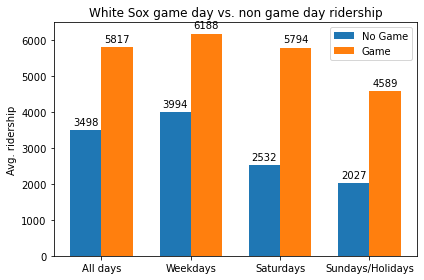

In [131]:
# Displaying the above variables in a side-by-side bar chart comparison

ws_labels = ['All days', 'Weekdays', 'Saturdays', 'Sundays/Holidays']
ws_nongameday_means = [ws_non_gameday_mean, ws_weekday_nongameday_mean, ws_saturday_nongameday_mean, ws_sundayholiday_nongameday_mean]
ws_gameday_means = [ws_gameday_mean, ws_weekday_gameday_mean, ws_saturday_gameday_mean, ws_sundayholiday_gameday_mean]

x = np.arange(len(ws_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ws_nongameday_means, width, label='No Game')
rects2 = ax.bar(x + width/2, ws_gameday_means, width, label='Game')

ax.set_ylabel('Avg. ridership')
ax.set_title('White Sox game day vs. non game day ridership')
ax.set_xticks(x)
ax.set_xticklabels(ws_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Excluding 2020 from non-gamedays, there is still a significant increase in ridership on gamedays. On average, a gameday sees an increase of 2/3rds in riderships
* On weekdays, the ridership increases by 55%
* On Saturdays, the rirdership increases by 129%
* On Sundays/Holidays, the ridership increases by 126%

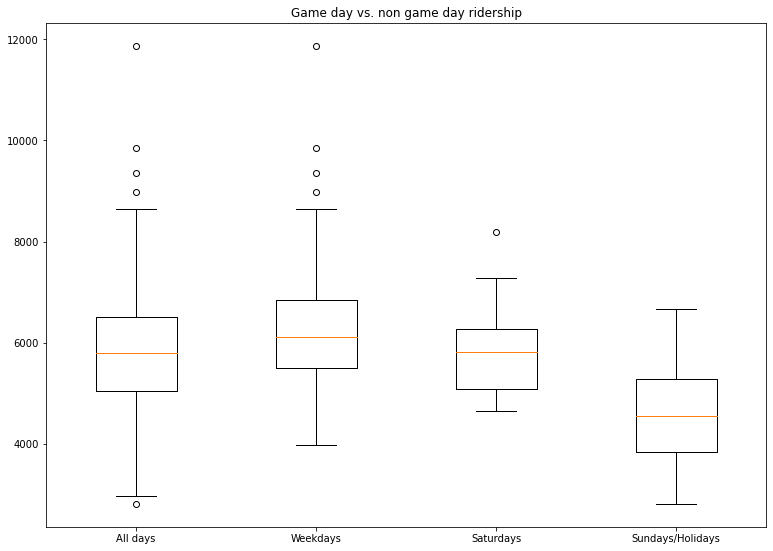

In [132]:
# Creating four variables to show the distribution of ridership on all days, weekdays, Saturdays and Sundays/Holidays

data_1 = ws_game_day_df['rides']
data_2 = ws_game_day_df.loc[ws_game_day_df['daytype'] == 'W', 'rides']
data_3 = ws_game_day_df.loc[ws_game_day_df['daytype'] == 'A', 'rides']
data_4 = ws_game_day_df.loc[ws_game_day_df['daytype'] == 'U', 'rides']
data = [data_1, data_2, data_3, data_4] 
  
fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_title('Game day vs. non game day ridership')
  
bp = ax.boxplot(data, labels=ws_labels) 
  
plt.show() 

## The highest gameday ridership is on weekdays with a significant dip on Sundays.
### However, the attendance on Saturdays is more predictable/even.

In [133]:
# Sorting the dataframe by ridership on gamedays

ws_game_day_df.sort_values(by='rides', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
162887,638534,40190,Sox-35th-Dan Ryan,2017-07-27,W,11874,False,False,False,False,True,2017-07-01,2017,7
40092,40097,40190,Sox-35th-Dan Ryan,2018-09-21,W,9844,False,False,False,False,True,2018-09-01,2018,9
83500,83505,40190,Sox-35th-Dan Ryan,2019-07-03,W,9367,False,False,False,False,True,2019-07-01,2019,7
79316,79321,40190,Sox-35th-Dan Ryan,2019-06-14,W,8989,False,False,False,False,True,2019-06-01,2019,6
143983,292369,40190,Sox-35th-Dan Ryan,2017-07-26,W,8636,False,False,False,False,True,2017-07-01,2017,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70609,70614,40190,Sox-35th-Dan Ryan,2019-04-28,U,3307,False,False,False,False,True,2019-04-01,2019,4
74876,74881,40190,Sox-35th-Dan Ryan,2019-05-19,U,3186,False,False,False,False,True,2019-05-01,2019,5
70588,70593,40190,Sox-35th-Dan Ryan,2019-04-07,U,3087,False,False,False,False,True,2019-04-01,2019,4
27325,27330,40190,Sox-35th-Dan Ryan,2018-05-20,U,2966,False,False,False,False,True,2018-05-01,2018,5


## The White Sox game with the highest ridership was on July 27th, 2017 vs. the Cubs
### 39,422 people attended the game which means that 30% of the attendees left via CTA 'L' Train

In [137]:
# Creating a new dataframe for the station closest to the Cubs stadium

cubs_df = all_data_df.loc[(all_data_df['station_id'] == 41420) | (all_data_df['station_id'] == 41320) & (~all_data_df['date'].astype(str).str.contains('2020', na=False))]
cubs_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
9,9,41420,Addison-North Main,2017-12-19,W,6034,False,False,False,False,False,2017-12-01,2017,12
67,67,41320,Belmont-North Main,2017-12-28,W,6981,False,False,False,False,False,2017-12-01,2017,12
141,141,41320,Belmont-North Main,2017-12-12,W,11192,True,False,False,False,False,2017-12-01,2017,12
293,293,41420,Addison-North Main,2017-12-06,W,6136,False,False,True,False,False,2017-12-01,2017,12
430,430,41420,Addison-North Main,2017-12-22,W,4848,False,False,False,False,False,2017-12-01,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196287,1027645,41420,Addison-North Main,2020-09-26,A,1364,False,False,False,False,False,2020-09-01,2020,9
196288,1027646,41420,Addison-North Main,2020-09-27,U,1044,False,False,False,False,False,2020-09-01,2020,9
196289,1027647,41420,Addison-North Main,2020-09-28,W,1128,False,False,False,False,False,2020-09-01,2020,9
196290,1027648,41420,Addison-North Main,2020-09-29,W,1198,False,False,False,False,False,2020-09-01,2020,9


In [138]:
cubs_game_day_df = cubs_df.loc[(cubs_df['Cubs'] == True)]
cubs_game_day_df
cubs_game_day_df.sort_values(by='rides', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
147536,356457,41420,Addison-North Main,2017-07-24,W,27679,False,True,False,False,False,2017-07-01,2017,7
170035,767751,41420,Addison-North Main,2017-07-25,W,21427,False,True,False,False,False,2017-07-01,2017,7
34674,34679,41420,Addison-North Main,2018-07-21,A,21289,False,True,False,False,False,2018-07-01,2018,7
82684,82689,41420,Addison-North Main,2019-06-22,A,19828,False,True,False,False,False,2019-06-01,2019,6
163087,642088,41420,Addison-North Main,2017-06-09,W,18363,False,True,False,False,False,2017-06-01,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196268,1027626,41420,Addison-North Main,2020-09-07,U,871,False,True,False,False,False,2020-09-01,2020,9
187550,1018908,41420,Addison-North Main,2020-07-26,U,814,False,True,False,False,False,2020-07-01,2020,7
191959,1023317,41420,Addison-North Main,2020-08-02,U,802,False,True,False,False,False,2020-08-01,2020,8
191973,1023331,41420,Addison-North Main,2020-08-16,U,762,False,True,False,False,False,2020-08-01,2020,8


In [139]:
cubs_gameday_mean = round(cubs_game_day_df['rides'].mean())
cubs_weekday_gameday_mean = round(cubs_game_day_df.loc[cubs_game_day_df['daytype'] == 'W', 'rides'].mean())
cubs_saturday_gameday_mean = round(cubs_game_day_df.loc[cubs_game_day_df['daytype'] == 'A', 'rides'].mean())
cubs_sundayholiday_gameday_mean = round(cubs_game_day_df.loc[cubs_game_day_df['daytype'] == 'U', 'rides'].mean())

In [140]:
cubs_non_game_day_df = cubs_df.loc[(cubs_df['Cubs'] == False)]
cubs_non_game_day_df.sort_values(by='date', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
196290,1027648,41420,Addison-North Main,2020-09-29,W,1198,False,False,False,False,False,2020-09-01,2020,9
196289,1027647,41420,Addison-North Main,2020-09-28,W,1128,False,False,False,False,False,2020-09-01,2020,9
196288,1027646,41420,Addison-North Main,2020-09-27,U,1044,False,False,False,False,False,2020-09-01,2020,9
196287,1027645,41420,Addison-North Main,2020-09-26,A,1364,False,False,False,False,False,2020-09-01,2020,9
196286,1027644,41420,Addison-North Main,2020-09-25,W,1538,False,False,False,False,False,2020-09-01,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155596,505951,41320,Belmont-North Main,2017-01-03,W,10732,False,False,False,False,False,2017-01-01,2017,1
182633,998127,41320,Belmont-North Main,2017-01-02,U,6318,False,False,False,False,False,2017-01-01,2017,1
138732,198256,41420,Addison-North Main,2017-01-02,U,3040,False,False,False,False,False,2017-01-01,2017,1
171322,792119,41320,Belmont-North Main,2017-01-01,U,7383,False,False,False,False,False,2017-01-01,2017,1


In [141]:
cubs_non_gameday_mean = round(cubs_non_game_day_df['rides'].mean())
cubs_weekday_nongameday_mean = round(cubs_non_game_day_df.loc[cubs_non_game_day_df['daytype'] == 'W', 'rides'].mean())
cubs_saturday_nongameday_mean = round(cubs_non_game_day_df.loc[cubs_non_game_day_df['daytype'] == 'A', 'rides'].mean())
cubs_sundayholiday_nongameday_mean = round(cubs_non_game_day_df.loc[cubs_non_game_day_df['daytype'] == 'U', 'rides'].mean())

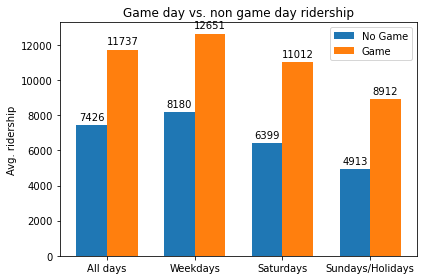

In [142]:
# Displaying the above variables in a side-by-side bar chart comparison

cubs_nongameday_means = [cubs_non_gameday_mean, cubs_weekday_nongameday_mean, cubs_saturday_nongameday_mean, cubs_sundayholiday_nongameday_mean]
cubs_gameday_means = [cubs_gameday_mean, cubs_weekday_gameday_mean, cubs_saturday_gameday_mean, cubs_sundayholiday_gameday_mean]

fig, ax = plt.subplots()
rects3 = ax.bar(x - width/2, cubs_nongameday_means, width, label='No Game')
rects4 = ax.bar(x + width/2, cubs_gameday_means, width, label='Game')

ax.set_ylabel('Avg. ridership')
ax.set_title('Game day vs. non game day ridership')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

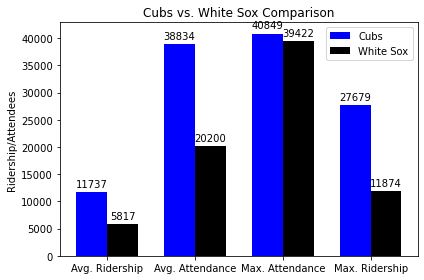

In [196]:
# Doing a Cubs vs. White Sox comparison

labels2 = ['Avg. Ridership', 'Avg. Attendance', 'Max. Attendance', 'Max. Ridership']
cubs_means = [cubs_gameday_mean, 38834, 40849, 27679]
whitesox_means = [ws_gameday_mean, 20200, 39422, 11874]

x2 = np.arange(len(labels2))

fig, ax = plt.subplots()
rects5 = ax.bar(x2 - width/2, cubs_means, width, color='blue', label='Cubs')
rects6 = ax.bar(x2 + width/2, whitesox_means, width, color='black', label='White Sox')

ax.set_ylabel('Ridership/Attendees')
ax.set_title('Cubs vs. White Sox Comparison')
ax.set_xticks(x2)
ax.set_xticklabels(labels2)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

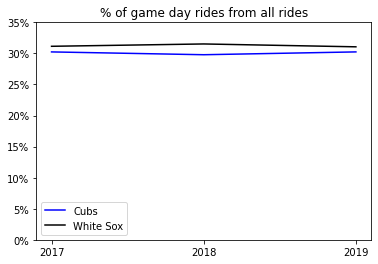

In [187]:
years = ["2017", "2018", "2019"]

cubs_gamedayrides_2017 = cubs_game_day_df.loc[cubs_game_day_df['year'] == 2017, 'rides'].sum()
cubs_total_rides_2017 = cubs_df.loc[cubs_df['year'] == 2017, 'rides'].sum()
cubs_percentage_of_gameday_rides_2017 = (cubs_gamedayrides_2017/cubs_total_rides_2017)
sox_gamedayrides_2017 = ws_game_day_df.loc[ws_game_day_df['year'] == 2017, 'rides'].sum()
sox_total_rides_2017 = white_sox_df.loc[white_sox_df['year'] == 2017, 'rides'].sum()
sox_percentage_of_gameday_rides_2017 = (sox_gamedayrides_2017/sox_total_rides_2017)
cubs_gamedayrides_2018 = cubs_game_day_df.loc[cubs_game_day_df['year'] == 2018, 'rides'].sum()
cubs_total_rides_2018 = cubs_df.loc[cubs_df['year'] == 2018, 'rides'].sum()
cubs_percentage_of_gameday_rides_2018 = (cubs_gamedayrides_2018/cubs_total_rides_2018)
sox_gamedayrides_2018 = ws_game_day_df.loc[ws_game_day_df['year'] == 2018, 'rides'].sum()
sox_total_rides_2018 = white_sox_df.loc[white_sox_df['year'] == 2018, 'rides'].sum()
sox_percentage_of_gameday_rides_2018 = (sox_gamedayrides_2018/sox_total_rides_2018)
cubs_gamedayrides_2019 = cubs_game_day_df.loc[cubs_game_day_df['year'] == 2019, 'rides'].sum()
cubs_total_rides_2019 = cubs_df.loc[cubs_df['year'] == 2019, 'rides'].sum()
cubs_percentage_of_gameday_rides_2019 = (cubs_gamedayrides_2019/cubs_total_rides_2019)
sox_gamedayrides_2019 = ws_game_day_df.loc[ws_game_day_df['year'] == 2019, 'rides'].sum()
sox_total_rides_2019 = white_sox_df.loc[white_sox_df['year'] == 2019, 'rides'].sum()
sox_percentage_of_gameday_rides_2019 = (sox_gamedayrides_2019/sox_total_rides_2019)
cubs_percentage_of_gameday_rides = [cubs_percentage_of_gameday_rides_2017, cubs_percentage_of_gameday_rides_2018, cubs_percentage_of_gameday_rides_2019]
sox_percentage_of_gameday_rides = [sox_percentage_of_gameday_rides_2017, sox_percentage_of_gameday_rides_2018, sox_percentage_of_gameday_rides_2019]

cubs_gamedays_2017 = cubs_game_day_df.loc[cubs_game_day_df['year'] == 2017, 'rides'].count()
total_days_2017 = all_days_df.loc[all_days_df['year'] == 2017, 'rides'].count()
cubs_percentage_of_rides_2017 = (cubs_gamedays_2017/total_days_2017)
sox_gamedays_2017 = ws_game_day_df.loc[ws_game_day_df['year'] == 2017, 'rides'].count()
sox_percentage_of_rides_2017 = (sox_gamedays_2017/total_days_2017)
cubs_gamedays_2018 = cubs_game_day_df.loc[cubs_game_day_df['year'] == 2018, 'rides'].count()
total_days_2018 = all_days_df.loc[all_days_df['year'] == 2018, 'rides'].count()
cubs_percentage_of_rides_2018 = (cubs_gamedays_2018/total_days_2018)
sox_gamedays_2018 = ws_game_day_df.loc[ws_game_day_df['year'] == 2018, 'rides'].count()
sox_percentage_of_rides_2018 = (sox_gamedays_2018/total_days_2018)
cubs_gamedays_2019 = cubs_game_day_df.loc[cubs_game_day_df['year'] == 2019, 'rides'].count()
total_days_2019 = all_days_df.loc[all_days_df['year'] == 2019, 'rides'].count()
cubs_percentage_of_rides_2019 = (cubs_gamedays_2019/total_days_2019)
sox_gamedays_2019 = ws_game_day_df.loc[ws_game_day_df['year'] == 2019, 'rides'].count()
sox_percentage_of_rides_2019 = (sox_gamedays_2019/total_days_2019)
cubs_percentage_of_rides = [cubs_percentage_of_rides_2017, cubs_percentage_of_rides_2018, cubs_percentage_of_rides_2019]
sox_percentage_of_rides = [sox_percentage_of_rides_2017, sox_percentage_of_rides_2018, sox_percentage_of_rides_2019]

# Plot the world average as a line chart
cubs_rides = plt.plot(years2, cubs_percentage_of_gameday_rides, color="blue", label="Cubs")
sox_rides = plt.plot(years2, sox_percentage_of_gameday_rides, color="black", label="White Sox")

plt.ylim(0, 0.35)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
ax.legend()
plt.title('% of game day rides from all rides')

# Show the chart
plt.show()

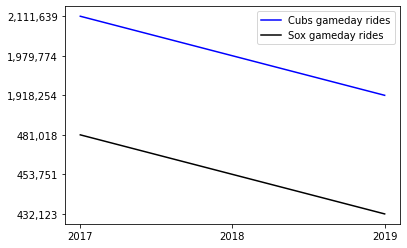

In [188]:
years2 = ["2017", "2018", "2019"]
cubs_gamedayrides_2017 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2017, 'rides'].sum())
sox_gamedayrides_2017 = round(game_day_df.loc[game_day_df['year'] == 2017, 'rides'].sum())
cubs_gamedayrides_2018 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2018, 'rides'].sum())
sox_gamedayrides_2018 = round(game_day_df.loc[game_day_df['year'] == 2018, 'rides'].sum())
cubs_gamedayrides_2019 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2019, 'rides'].sum())
sox_gamedayrides_2019 = round(game_day_df.loc[game_day_df['year'] == 2019, 'rides'].sum())
cubs_gamedayrides = [f'{cubs_gamedayrides_2017:,}', f'{cubs_gamedayrides_2018:,}', f'{cubs_gamedayrides_2019:,}']
sox_gamedayrides = [f'{sox_gamedayrides_2017:,}', f'{sox_gamedayrides_2018:,}', f'{sox_gamedayrides_2019:,}']

# Plot the world average as a line chart
cubs_rides_3 = plt.plot(years2, cubs_gamedayrides, color="blue", label="Cubs gameday rides")
sox_rides_3 = plt.plot(years2, sox_gamedayrides, color="black", label="Sox gameday rides")

plt.legend()
plt.gca().invert_yaxis()

# Show the chart
plt.show()

In [115]:
all_days_df = new_white_sox_df.loc[~new_white_sox_df['date'].astype(str).str.contains('2020', na=False)]
all_days_df.sort_values(by='date', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
105511,105516,40190,Sox-35th-Dan Ryan,2019-12-31,W,2395,False,False,False,False,False,2019-12-01,2019,12
105510,105515,40190,Sox-35th-Dan Ryan,2019-12-30,W,2426,False,False,True,False,False,2019-12-01,2019,12
105509,105514,40190,Sox-35th-Dan Ryan,2019-12-29,U,1622,False,False,False,False,False,2019-12-01,2019,12
105508,105513,40190,Sox-35th-Dan Ryan,2019-12-28,A,1867,False,False,True,False,False,2019-12-01,2019,12
105507,105512,40190,Sox-35th-Dan Ryan,2019-12-27,W,2567,True,False,False,False,False,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136524,157595,40190,Sox-35th-Dan Ryan,2017-01-05,W,3159,False,False,False,False,False,2017-01-01,2017,1
150693,415537,40190,Sox-35th-Dan Ryan,2017-01-04,W,3106,False,False,False,False,False,2017-01-01,2017,1
152904,456086,40190,Sox-35th-Dan Ryan,2017-01-03,W,3218,False,False,False,False,False,2017-01-01,2017,1
149758,398370,40190,Sox-35th-Dan Ryan,2017-01-02,U,1908,False,False,False,False,False,2017-01-01,2017,1


In [201]:
cubs_gamedays_2017/2

81.0

In [200]:
sox_gamedays_2017

79